From here:

+ https://cran.r-project.org/web/packages/palaeoverse/vignettes/phanerozoic-reefs.html

In [1]:
library("palaeoverse")

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)



In [5]:
citation("palaeoverse")


To cite palaeoverse in publications, use the following citation:

  Jones, L.A., Gearty, W., Allen, B.J., Eichenseer, K., Dean, C.D.,
  Galván S., Kouvari, M., Godoy, P.L., Nicholl, C.S.C., Dillon, E.M.,
  Flannery-Sutherland, J.T., Chiarenza, A.A. 2022. palaeoverse: A
  community-driven R package to support palaeobiological analysis.
  Methods in Ecology and Evolution. 00, 1--11. doi:
  10.1111/2041-210X.14099

A BibTeX entry for LaTeX users is

  @Article{,
    title = {palaeoverse: A community-driven R package to support palaeobiological analysis},
    author = {Lewis A. Jones and William Gearty and Bethany J. Allen and Kilian Eichenseer and Christopher D. Dean and Sofía Galván and Miranta Kouvari and Pedro L. Godoy and Cecily S. C. Nicholl and Lucas Buffan and Erin M. Dillon and Joseph T. Flannery-Sutherland and Alfio Alessandro Chiarenza},
    year = {2023},
    journal = {Methods in Ecology and Evolution},
    pages = {1--11},
    doi = {10.1111/2041-210X.14099},
  }


In [83]:
# Load the dataset
data(reefs)
# View the first five rows & columns of reefs
reefs[1:5, 1:5]

,r_number,name,formation,system,series
,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,Tilkideligi Tepe,,Triassic,Upper Triassic
2,2,Hydra,Pantokrator Limestone,Triassic,Upper Triassic
3,3,"Shiraho, W-Pacific",,Neogene,Holocene
4,4,Aksu-Terziler area,,Triassic,Upper Triassic
5,5,"Adnet, Salzburg",,Triassic,Upper Triassic


In [84]:
# # Call documentation for dataset
# ?reefs
# # You can also use
# help(reefs)

In [85]:
# How many reefs are there in the dataset?
# Each row represents an individual reef.
nrow(reefs)

[1] 4363

In [86]:
# How many reefs per interval?
# Let's group by the interval column to test
reef_counts <- group_apply(occdf = reefs, group = "interval", fun = nrow)
head(reef_counts)

,nrow,interval
,<int>,<chr>
1,2,(early?) Toarcian
2,1,Aalenian-Bajocian
3,4,Aalenian/Bajocian
4,1,Aalenian/lower Bajocian
5,1,Abadehian
6,6,Aeronian


In [87]:
# Load the interval key
data("interval_key")
# Assign a common time scale based on an interval key
reefs <- look_up(occdf = reefs,
                 early_interval = "interval",
                 late_interval = "interval",
                 int_key = interval_key)
# Example output
reefs[100:110, 15:19]

,early_stage,late_stage,interval_max_ma,interval_mid_ma,interval_min_ma
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
100,Ladinian,Carnian,242.0,234.50,227.0
101,Norian,Norian,227.0,217.75,208.5
102,Rhaetian,Rhaetian,208.5,204.90,201.3
103,Ladinian,Carnian,242.0,234.50,227.0
104,Norian,Rhaetian,227.0,214.15,201.3
105,Anisian,Anisian,247.2,244.60,242.0
106,Rhaetian,Rhaetian,208.5,204.90,201.3
107,Sinemurian,Sinemurian,199.3,195.05,190.8
108,Oxfordian,Oxfordian,163.5,160.40,157.3


In [88]:
write.csv(reefs,'data/PARED_time_simple.csv')

In [71]:
# Now we have numeric ages for our data, we can easily
# remove pre-Phanerozoic data to focus our study
reefs <- subset(reefs, interval_max_ma <= 541)
# Extract Phanerozoic stage-level stages for time bins
bins <- time_bins(interval = "Phanerozoic", rank = "stage")
# Bin data
# bin_time requires "max_ma" and "min_ma" columns
# Rename columns in reefs
colnames(reefs)[which(colnames(reefs) == "interval_max_ma")] <- "max_ma"
colnames(reefs)[which(colnames(reefs) == "interval_min_ma")] <- "min_ma"

In [72]:
# Five methods exist in bin_time for binning occurrence data
# You can see details on each via ?bin_time
# Bin by midpoint age
bin_time(occdf = reefs, bins = bins, method = "mid")
# Bin by overlap majority
# bin_time(occdf = reefs, bins = bins, method = "majority")
# # Bin into every bin within age range
# bin_time(occdf = reefs, bins = bins, method = "all")
# # Bin randomly into bins within age range (equal probability)
# bin_time(occdf = reefs, bins = bins, method = "random", reps = 10)
# # Bin randomly into bins within age range (uniform probability)
# bin_time(occdf = reefs, bins = bins, method = "point", reps = 10)

,r_number,name,formation,system,series,interval,biota_main,biota_sec,lng,lat,⋯,year,early_stage,late_stage,max_ma,interval_mid_ma,min_ma,id,n_bins,bin_assignment,bin_midpoint
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>
1,1,Tilkideligi Tepe,,Triassic,Upper Triassic,lower Norian,Calcisponges,Stromatoporoids,30.3833,37.0333,⋯,1990,Norian,Norian,227.0000,217.75000,208.5,1,1,54,217.7500
2,2,Hydra,Pantokrator Limestone,Triassic,Upper Triassic,upper Carnian,Corals,Calcisponges,23.6333,37.3833,⋯,1982,Carnian,Carnian,237.0000,232.00000,227.0,2,1,53,232.0000
3,3,"Shiraho, W-Pacific",,Neogene,Holocene,Recent,Corals,Algae,124.2500,24.3333,⋯,1995,Holocene,Holocene,0.0117,0.00585,0.0,3,3,101,0.0062
4,4,Aksu-Terziler area,,Triassic,Upper Triassic,Tuvalian,Calcisponges,Stromatoporoids,31.0333,37.8000,⋯,1990,Carnian,Carnian,237.0000,232.00000,227.0,4,1,53,232.0000
5,5,"Adnet, Salzburg",,Triassic,Upper Triassic,upper Rhaetian,Corals,Calcisponges,13.1667,47.7000,⋯,1979,Rhaetian,Rhaetian,208.5000,204.90000,201.3,5,1,55,204.9000
6,6,Rotelwand,,Triassic,Upper Triassic,Rhaetian,Corals,Calcisponges,13.1833,47.7000,⋯,1979,Rhaetian,Rhaetian,208.5000,204.90000,201.3,6,1,55,204.9000
7,7,Rio Blanco,,Triassic,Upper Triassic,Rhaetian,"Serpulids, worms, vermetids","Serpulids, worms, vermetids",-3.4333,37.3250,⋯,1989,Rhaetian,Rhaetian,208.5000,204.90000,201.3,7,1,55,204.9000
8,8,"Anxian, Sichuan",Hanwang,Triassic,Upper Triassic,upper Carnian,Siliceous sponges,"Serpulids, worms, vermetids",104.4333,31.6167,⋯,1989,Carnian,Carnian,237.0000,232.00000,227.0,8,1,53,232.0000
9,9,Grimming,,Triassic,Upper Triassic,upper Norian,Calcisponges,Corals,14.2500,47.5833,⋯,1986,Norian,Norian,227.0000,217.75000,208.5,9,1,54,217.7500


In [78]:
# Let's go with "all" for this example!
reefs <- bin_time(occdf = reefs, bins = bins, method = "all")

In [79]:
reefs

,r_number,name,formation,system,series,interval,biota_main,biota_sec,lng,lat,⋯,year,early_stage,late_stage,max_ma,interval_mid_ma,min_ma,id,n_bins,bin_assignment,bin_midpoint
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>
1,1,Tilkideligi Tepe,,Triassic,Upper Triassic,lower Norian,Calcisponges,Stromatoporoids,30.3833,37.0333,⋯,1990,Norian,Norian,227.0000,217.75000,208.5,1,1,54,217.75000
2,2,Hydra,Pantokrator Limestone,Triassic,Upper Triassic,upper Carnian,Corals,Calcisponges,23.6333,37.3833,⋯,1982,Carnian,Carnian,237.0000,232.00000,227.0,2,1,53,232.00000
3,3,"Shiraho, W-Pacific",,Neogene,Holocene,Recent,Corals,Algae,124.2500,24.3333,⋯,1995,Holocene,Holocene,0.0117,0.00585,0.0,3,3,100,0.00995
4,3,"Shiraho, W-Pacific",,Neogene,Holocene,Recent,Corals,Algae,124.2500,24.3333,⋯,1995,Holocene,Holocene,0.0117,0.00585,0.0,3,3,101,0.00620
5,3,"Shiraho, W-Pacific",,Neogene,Holocene,Recent,Corals,Algae,124.2500,24.3333,⋯,1995,Holocene,Holocene,0.0117,0.00585,0.0,3,3,102,0.00210
6,4,Aksu-Terziler area,,Triassic,Upper Triassic,Tuvalian,Calcisponges,Stromatoporoids,31.0333,37.8000,⋯,1990,Carnian,Carnian,237.0000,232.00000,227.0,4,1,53,232.00000
7,5,"Adnet, Salzburg",,Triassic,Upper Triassic,upper Rhaetian,Corals,Calcisponges,13.1667,47.7000,⋯,1979,Rhaetian,Rhaetian,208.5000,204.90000,201.3,5,1,55,204.90000
8,6,Rotelwand,,Triassic,Upper Triassic,Rhaetian,Corals,Calcisponges,13.1833,47.7000,⋯,1979,Rhaetian,Rhaetian,208.5000,204.90000,201.3,6,1,55,204.90000
9,7,Rio Blanco,,Triassic,Upper Triassic,Rhaetian,"Serpulids, worms, vermetids","Serpulids, worms, vermetids",-3.4333,37.3250,⋯,1989,Rhaetian,Rhaetian,208.5000,204.90000,201.3,7,1,55,204.90000


In [80]:
# Count number of occurrences per interval
reefs_time <- group_apply(occdf = reefs, group = "interval_mid_ma", fun = nrow)
# Check output
head(reefs_time)

,nrow,interval_mid_ma
,<int>,<chr>
1,9,0.00585
2,85,0.07035
3,10,0.39285
4,17,0.4515
5,68,1.29585
6,9,1.3545


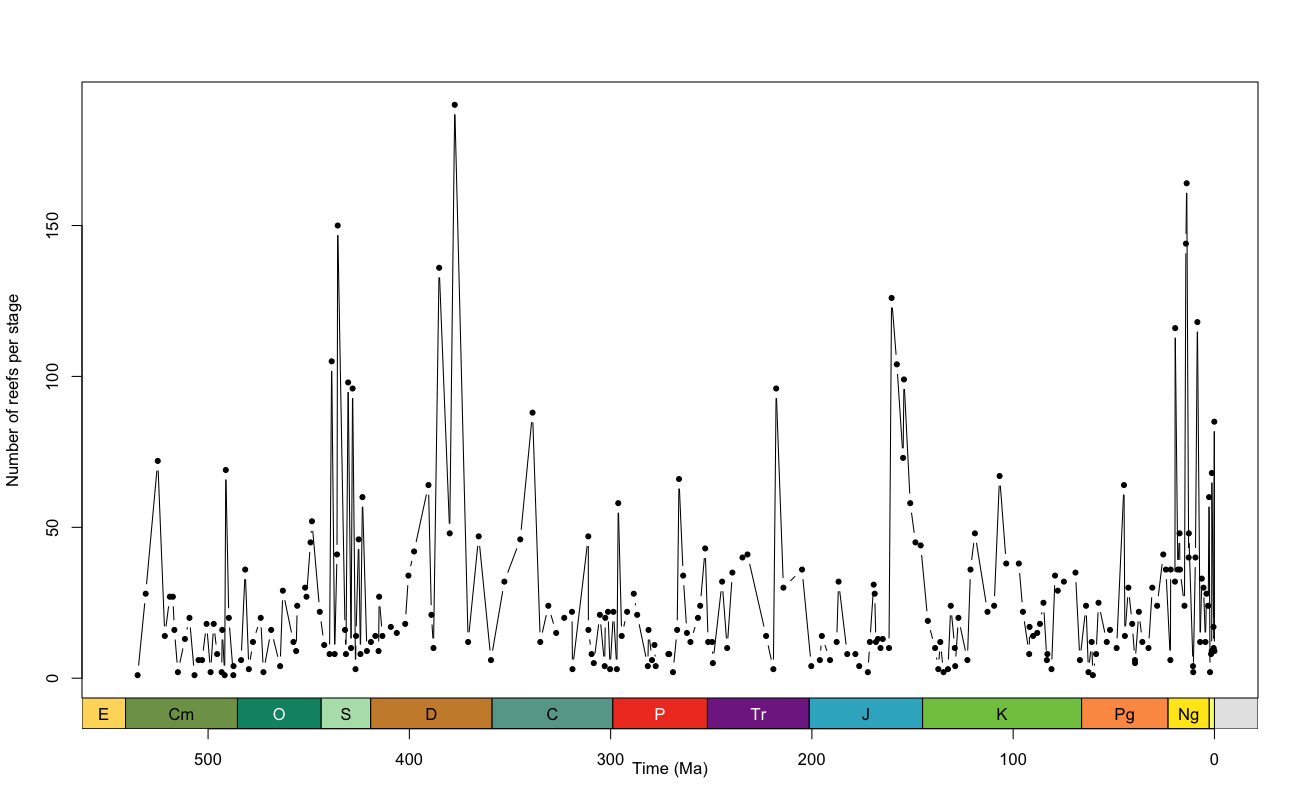

In [81]:
library("repr")
options(repr.plot.width=13, repr.plot.height=8)
# Plot data
plot(x = reefs_time$interval_mid_ma,
     y = reefs_time$nrow,
     xlab = "Time (Ma)",
     ylab = "Number of reefs per stage",
     xlim = c(541, 0),
     xaxt = "n",
     type = "b", pch = 20,
#      cex.main=1.25, cex.lab=2, cex.axis=2
    )
# Add axis of the geological time scale
axis_geo(side = 1, intervals = "periods")

In [82]:
# Palaeorotate occurrences
reefs <- palaeorotate(occdf = reefs, age = "bin_midpoint",
                      method = "point", model = "PALEOMAP")

PALEOMAP

Warning message in palaeorotate(occdf = reefs, age = "bin_midpoint", method = "point", :
“Palaeocoordinates could not be reconstructed for all points.
Either assigned plate does not exist at time of reconstruction or the plate rotation model(s) does not cover the age of reconstruction.”


,r_number,name,formation,system,series,interval,biota_main,biota_sec,lng,lat,⋯,p_lng,p_lat,p_lng_GOLONKA,p_lat_GOLONKA,p_lng_PALEOMAP,p_lat_PALEOMAP,p_lng_MERDITH2021,p_lat_MERDITH2021,range_p_lat,max_dist
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Tilkideligi Tepe,,Triassic,Upper Triassic,lower Norian,Calcisponges,Stromatoporoids,30.383,37.033,⋯,21.3630,10.0755,35.6565,8.3384,21.3630,10.0755,34.4230,12.1941,3.8557,1582.319
2,2,Hydra,Pantokrator Limestone,Triassic,Upper Triassic,upper Carnian,Corals,Calcisponges,23.633,37.383,⋯,17.4435,25.5719,32.2609,19.9044,17.4435,25.5719,21.1582,26.5767,6.6723,1644.892
3,3,"Shiraho, W-Pacific",,Neogene,Holocene,Recent,Corals,Algae,124.250,24.333,⋯,-72.6726,27.3965,-47.2123,34.6578,-72.6726,27.3965,-46.7249,37.2704,9.8739,2665.477
4,3,"Shiraho, W-Pacific",,Neogene,Holocene,Recent,Corals,Algae,124.250,24.333,⋯,17.9163,13.7121,29.2657,8.3957,17.9163,13.7121,29.2360,12.8023,5.3164,1371.980
5,3,"Shiraho, W-Pacific",,Neogene,Holocene,Recent,Corals,Algae,124.250,24.333,⋯,18.0122,25.2688,32.6906,19.4663,18.0122,25.2688,21.8226,26.5278,7.0615,1641.218
6,4,Aksu-Terziler area,,Triassic,Upper Triassic,Tuvalian,Calcisponges,Stromatoporoids,31.033,37.800,⋯,16.5789,24.6727,31.1897,19.2698,16.5789,24.6727,27.9955,21.6152,5.4029,1622.004
7,5,"Adnet, Salzburg",,Triassic,Upper Triassic,upper Rhaetian,Corals,Calcisponges,13.167,47.700,⋯,18.8271,25.0225,33.3645,19.0191,18.8271,25.0225,22.6851,26.6270,7.6079,1640.111
8,6,Rotelwand,,Triassic,Upper Triassic,Rhaetian,Corals,Calcisponges,13.183,47.700,⋯,54.6552,30.4742,80.7032,47.4990,54.6552,30.4742,86.6039,26.2446,21.2544,3156.329
9,7,Rio Blanco,,Triassic,Upper Triassic,Rhaetian,"Serpulids, worms, vermetids","Serpulids, worms, vermetids",-3.433,37.325,⋯,54.8463,30.3389,80.9464,47.3633,54.8463,30.3389,86.7520,26.0779,21.2854,3157.146


In [29]:
# Check palaeocoordinates
head(reefs[, c("p_lng", "p_lat")])

,p_lng,p_lat
,<dbl>,<dbl>
1,21.3630,10.0755
2,17.4435,25.5719
3,-72.6726,27.3965
4,17.9163,13.7121
5,18.0122,25.2688
6,16.5789,24.6727


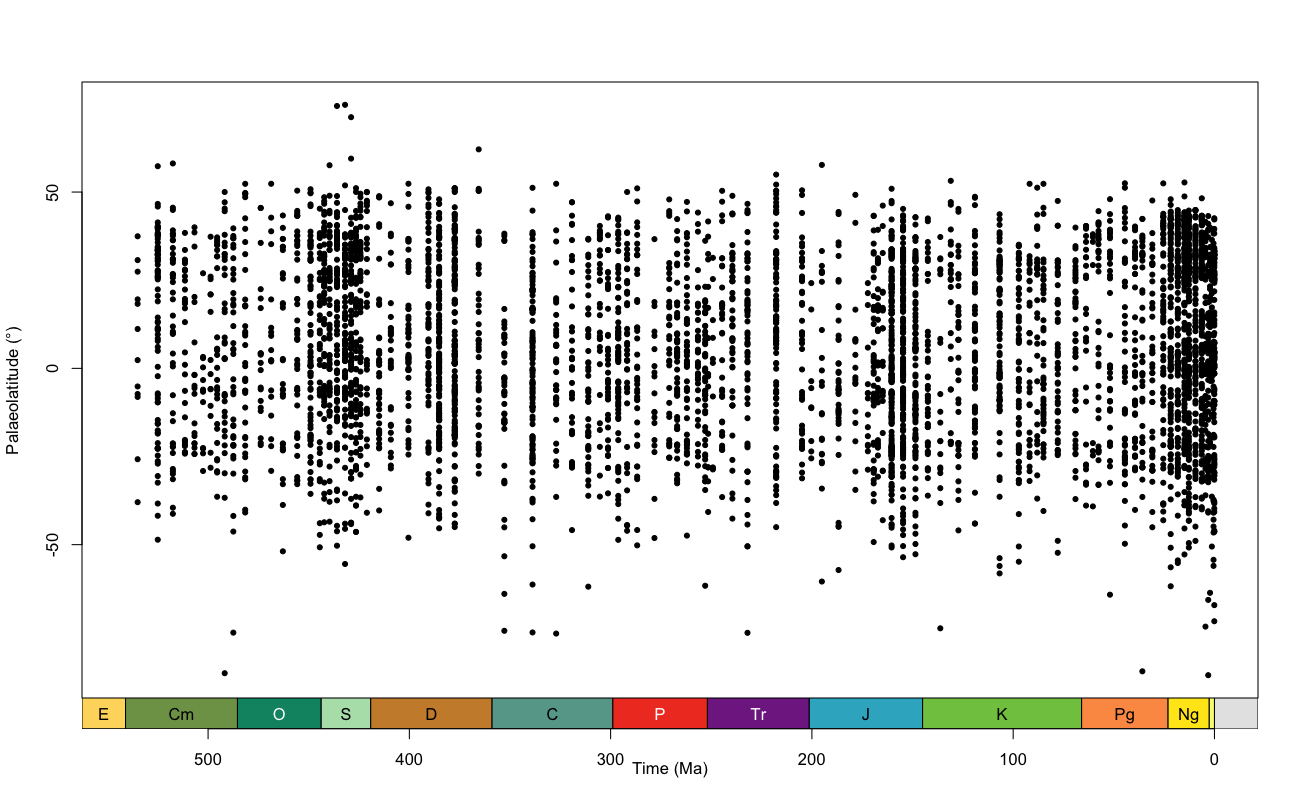

In [30]:
# Plot data
plot(x = reefs$bin_midpoint,
     y = reefs$p_lat,
     xlab = "Time (Ma)",
     ylab = "Palaeolatitude (\u00B0)",
     xlim = c(541, 0),
     xaxt = "n",
     type = "p", pch = 20)
axis_geo(side = 1, intervals = "periods")

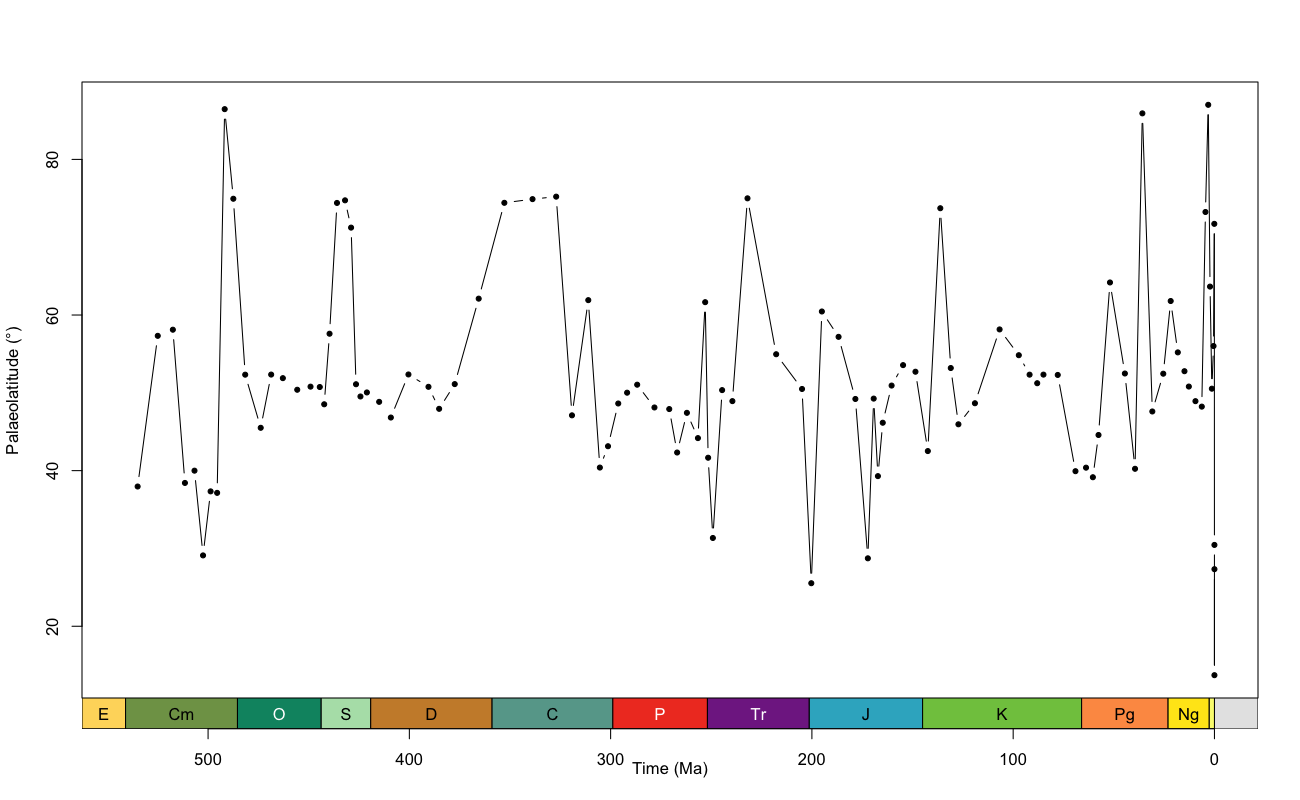

In [31]:
# Let's first assume hemispheric symmetry and convert
# palaeolatitudes to absolute palaeolatitudes
reefs$p_lat <- abs(reefs$p_lat)
# Now we can calculate the most poleward latitude per time bin
# Extract unique interval midpoints
midpoints <- sort(unique(reefs$bin_midpoint))
# Calculate the maximum palaeolatitude for each time bin
reefs_max <- sapply(X = midpoints, FUN = function(x) {
  max(reefs[which(reefs$bin_midpoint == x), ]$p_lat, na.rm = TRUE)
} )
# Plot data
plot(x = midpoints,
     y = reefs_max,
     xlab = "Time (Ma)",
     ylab = "Palaeolatitude (\u00B0)",
     xlim = c(541, 0),
     xaxt = "n",
     type = "b",
     pch = 20)
# Add axis of the geological time scale
axis_geo(side = 1, intervals = "periods")

In [32]:
# We can call multiple models at once with palaeorotate
# First, let's define the models...
models <- c("GOLONKA", "PALEOMAP", "MERDITH2021")
# And now palaeorotate!
reefs <- palaeorotate(occdf = reefs, age = "bin_midpoint",
                      method = "point", model = models)

GOLONKA

PALEOMAP

MERDITH2021

Warning message in palaeorotate(occdf = reefs, age = "bin_midpoint", method = "point", :
“Palaeocoordinates could not be reconstructed for all points.
Either assigned plate does not exist at time of reconstruction or the plate rotation model(s) does not cover the age of reconstruction.”


In [33]:
# Check palaeocoordinates
# When multiple models are called, the name of the model
# is added as a suffix to p_lng and p_lat
head(reefs[, c("p_lng_PALEOMAP", "p_lat_PALEOMAP",
               "p_lng_GOLONKA", "p_lat_GOLONKA",
               "p_lng_MERDITH2021", "p_lat_MERDITH2021")])

,p_lng_PALEOMAP,p_lat_PALEOMAP,p_lng_GOLONKA,p_lat_GOLONKA,p_lng_MERDITH2021,p_lat_MERDITH2021
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,21.3630,10.0755,35.6565,8.3384,34.4230,12.1941
2,17.4435,25.5719,32.2609,19.9044,21.1582,26.5767
3,-72.6726,27.3965,-47.2123,34.6578,-46.7249,37.2704
4,17.9163,13.7121,29.2657,8.3957,29.2360,12.8023
5,18.0122,25.2688,32.6906,19.4663,21.8226,26.5278
6,16.5789,24.6727,31.1897,19.2698,27.9955,21.6152


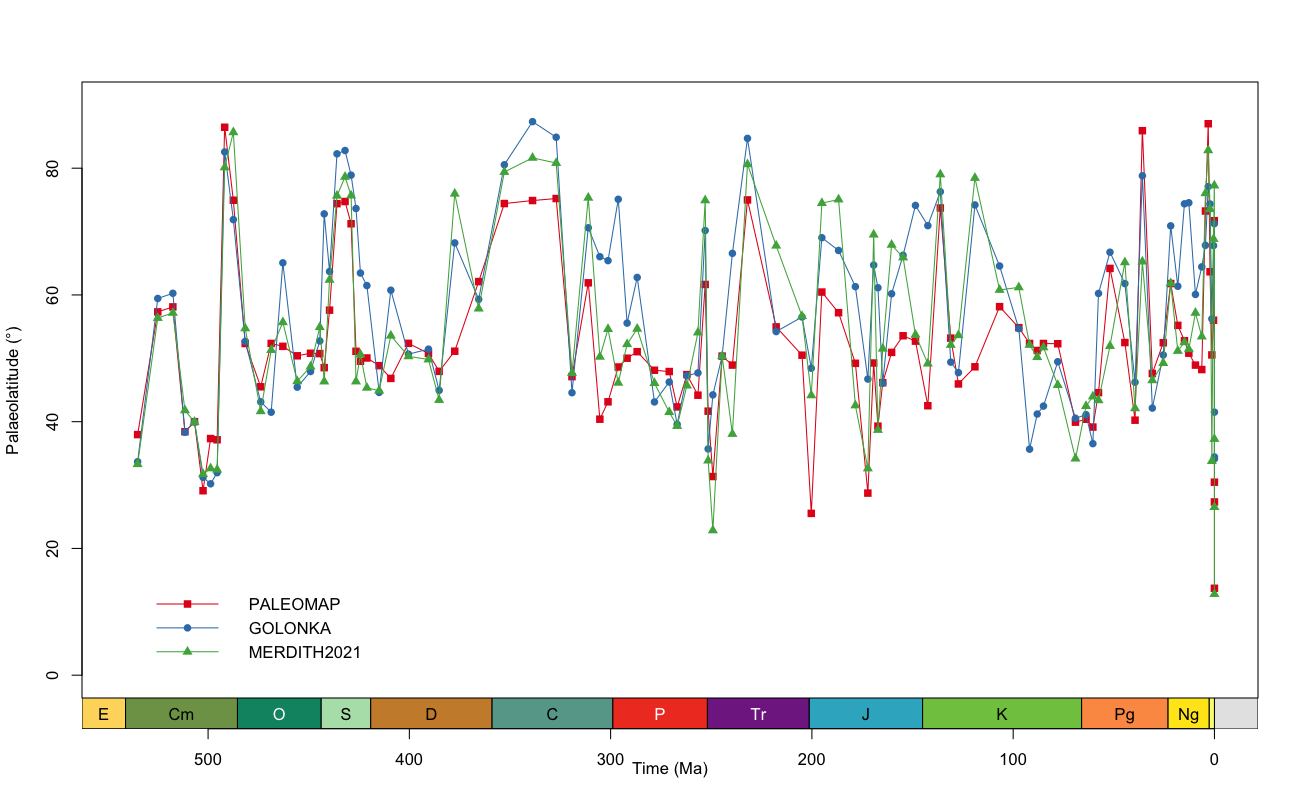

In [35]:
# Let's code a little helper function to begin with.
# This is generally useful when repeating code several times!
p_lat_max <- function(occdf, midpoint, p_lat) {
  # Get absolute palaeolatitudes
  occdf[, p_lat] <- abs(occdf[, p_lat])
  # Extract unique bin midpoints
  midpoints <- sort(unique(occdf[, midpoint]))
  # Calculate maximum palaeolatitude for each bin
  lat_max <- sapply(X = midpoints, FUN = function(x) {
    max(occdf[which(occdf[, midpoint] == x), ][, p_lat], na.rm = TRUE)
  })
  # Bind data
  lat_max <- cbind.data.frame(midpoints, lat_max)
  # Return df
  return(lat_max)
}
# Calculate maximum palaeolatitude of reefs for each time bin for each model
paleomap <- p_lat_max(occdf = reefs,
                      midpoint = "bin_midpoint",
                      p_lat = "p_lat_PALEOMAP")
golonka <- p_lat_max(occdf = reefs,
                     midpoint = "bin_midpoint",
                     p_lat = "p_lat_GOLONKA")
merdith <- p_lat_max(occdf = reefs,
                     midpoint = "bin_midpoint",
                     p_lat = "p_lat_MERDITH2021")
# Set up plot
plot(x = NULL,
     y = NULL,
     xlab = "Time (Ma)",
     ylab = "Palaeolatitude (\u00B0)",
     xlim = c(541, 0),
     ylim = c(0, 90),
     xaxt = "n")
# Plot maximum palaeolatitudes for each model
lines(x = paleomap$midpoints, y = paleomap$lat_max,
      type = "o", col = "#e41a1c", pch = 15)
lines(x = golonka$midpoints, y = golonka$lat_max,
      type = "o", col = "#377eb8", pch = 16)
lines(x = merdith$midpoints, y = merdith$lat_max,
      type = "o", col = "#4daf4a", pch = 17)
# Add legend
legend(530, 15, legend=c("PALEOMAP", "GOLONKA", "MERDITH2021"),
       col = c("#e41a1c", "#377eb8", "#4daf4a"),
       lty = 1, pch = c(15, 16, 17), bty = "n")
# Add geological time scale axis
axis_geo(side = 1, intervals = "periods")

In [36]:
write.csv(reefs,'data/PARED_time.csv')